In [1]:
## Import Libraries

import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
## Read Files

gdf_lsoa = gpd.read_file("Data/manchester_lsoa/manchester_lsoa.shp")

df_pop = pd.read_csv("Data/population_lsoa.csv", skiprows=3, low_memory=False)

df_car_disabled = pd.read_csv("Data/car_disabled_lsoa.csv")

df_annual_income = pd.read_csv("Data/average_income_msoa.csv", skiprows=4)

df_lookup = pd.read_csv("Data/msoa_lsoa_lookup.csv")

gdf_msoa = gpd.read_file("Data/manchester_msoa/manchester_msoa.shp")

## Populations

In [3]:
## Filter only population within Greater Manchester

pop_lsoa = df_pop[df_pop["LSOA 2021 Code"].isin(gdf_lsoa["lsoa21cd"].unique())]
pop_lsoa["Total"] = pop_lsoa["Total"].str.replace(",", "").astype(int)

/tmp/ipykernel_920/1361827563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_lsoa["Total"] = pop_lsoa["Total"].str.replace(",", "").astype(int)


In [4]:
pop_lsoa

,LAD 2021 Code,LAD 2021 Name,LSOA 2021 Code,LSOA 2021 Name,Total,F0,F1,F2,F3,F4,...,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90
530,E06000007,Warrington,E01012472,Warrington 001B,1865,0,14,5,5,10,...,5,11,6,11,4,6,0,0,7,4
533,E06000007,Warrington,E01012475,Warrington 002C,1495,6,5,10,5,5,...,5,5,6,6,0,6,6,0,0,5
534,E06000007,Warrington,E01012476,Warrington 001C,1578,7,5,10,5,5,...,5,5,6,0,6,0,6,7,0,5
535,E06000007,Warrington,E01012477,Warrington 001D,1614,3,5,5,10,5,...,5,5,6,6,6,6,0,0,0,10
573,E06000007,Warrington,E01012517,Warrington 021E,2340,12,14,10,10,15,...,5,5,5,5,0,0,7,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23612,E08000013,St. Helens,E01006885,St. Helens 001D,1327,0,5,5,5,5,...,5,4,0,5,5,0,0,7,0,5
27554,E08000033,Calderdale,E01010886,Calderdale 022C,1121,5,10,5,0,5,...,5,0,6,6,0,6,0,0,0,0
27623,E08000033,Calderdale,E01010955,Calderdale 027D,1400,8,5,5,10,5,...,0,5,0,0,0,0,0,0,0,0
27743,E08000034,Kirklees,E01011075,Kirklees 052C,1452,3,0,5,5,10,...,5,0,0,5,5,6,6,6,0,5


### Elderly Population (> 64 years old)

In [5]:
## Checking the columns for female 65+ and male 65+
print(pop_lsoa.columns[70:96])
print(pop_lsoa.columns[161:])

Index(['F65', 'F66', 'F67', 'F68', 'F69', 'F70', 'F71', 'F72', 'F73', 'F74',
       'F75', 'F76', 'F77', 'F78', 'F79', 'F80', 'F81', 'F82', 'F83', 'F84',
       'F85', 'F86', 'F87', 'F88', 'F89', 'F90'],
      dtype='object')
Index(['M65', 'M66', 'M67', 'M68', 'M69', 'M70', 'M71', 'M72', 'M73', 'M74',
       'M75', 'M76', 'M77', 'M78', 'M79', 'M80', 'M81', 'M82', 'M83', 'M84',
       'M85', 'M86', 'M87', 'M88', 'M89', 'M90'],
      dtype='object')


In [6]:
# Create new columns for elderly counts and percentage

## Create a list of columns for elderly male and female

elderly_f = pop_lsoa.columns[70:96]
elderly_m = pop_lsoa.columns[161:]

elderly = list(elderly_f) + list(elderly_m)

## Create a new column 'Population 65+' that sums all these columns
pop_lsoa["Population 65+"] = pop_lsoa[elderly].sum(axis=1)

## Create a new column 'Elderly Percentage' that calculates the percentage of 'Population 65+' over 'Total'
pop_lsoa["65+ Percentage"] = pop_lsoa["Population 65+"] / pop_lsoa["Total"] * 100
pop_lsoa

/tmp/ipykernel_920/103642390.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_lsoa["Population 65+"] = pop_lsoa[elderly].sum(axis=1)
/tmp/ipykernel_920/103642390.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_lsoa["65+ Percentage"] = pop_lsoa["Population 65+"] / pop_lsoa["Total"] * 100


,LAD 2021 Code,LAD 2021 Name,LSOA 2021 Code,LSOA 2021 Name,Total,F0,F1,F2,F3,F4,...,M83,M84,M85,M86,M87,M88,M89,M90,Population 65+,65+ Percentage
530,E06000007,Warrington,E01012472,Warrington 001B,1865,0,14,5,5,10,...,6,11,4,6,0,0,7,4,470,25.201072
533,E06000007,Warrington,E01012475,Warrington 002C,1495,6,5,10,5,5,...,6,6,0,6,6,0,0,5,328,21.939799
534,E06000007,Warrington,E01012476,Warrington 001C,1578,7,5,10,5,5,...,6,0,6,0,6,7,0,5,391,24.778200
535,E06000007,Warrington,E01012477,Warrington 001D,1614,3,5,5,10,5,...,6,6,6,6,0,0,0,10,312,19.330855
573,E06000007,Warrington,E01012517,Warrington 021E,2340,12,14,10,10,15,...,5,5,0,0,7,0,0,4,384,16.410256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23612,E08000013,St. Helens,E01006885,St. Helens 001D,1327,0,5,5,5,5,...,0,5,5,0,0,7,0,5,394,29.691032
27554,E08000033,Calderdale,E01010886,Calderdale 022C,1121,5,10,5,0,5,...,6,6,0,6,0,0,0,0,264,23.550401
27623,E08000033,Calderdale,E01010955,Calderdale 027D,1400,8,5,5,10,5,...,0,0,0,0,0,0,0,0,276,19.714286
27743,E08000034,Kirklees,E01011075,Kirklees 052C,1452,3,0,5,5,10,...,0,5,5,6,6,6,0,5,358,24.655647


### Children Population (< 17 years old)

In [7]:
## Checking the columns for female 16- and male 16-
print(pop_lsoa.columns[5:22])
print(pop_lsoa.columns[96:113])

Index(['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16'],
      dtype='object')
Index(['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10',
       'M11', 'M12', 'M13', 'M14', 'M15', 'M16'],
      dtype='object')


In [8]:
# Create new columns for children counts and percentage

## Create a list of columns for children male and female

children_f = pop_lsoa.columns[5:22]
children_m = pop_lsoa.columns[96:113]

children = list(children_f) + list(children_m)

## Create a new column 'Population 65+' that sums all these columns
pop_lsoa["Population 16-"] = pop_lsoa[children].sum(axis=1)

## Create a new column 'Elderly Percentage' that calculates the percentage of 'Population 65+' over 'Total'
pop_lsoa["16- Percentage"] = pop_lsoa["Population 16-"] / pop_lsoa["Total"] * 100
pop_lsoa

/tmp/ipykernel_920/4224950017.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_lsoa["Population 16-"] = pop_lsoa[children].sum(axis=1)
/tmp/ipykernel_920/4224950017.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_lsoa["16- Percentage"] = pop_lsoa["Population 16-"] / pop_lsoa["Total"] * 100


,LAD 2021 Code,LAD 2021 Name,LSOA 2021 Code,LSOA 2021 Name,Total,F0,F1,F2,F3,F4,...,M85,M86,M87,M88,M89,M90,Population 65+,65+ Percentage,Population 16-,16- Percentage
530,E06000007,Warrington,E01012472,Warrington 001B,1865,0,14,5,5,10,...,4,6,0,0,7,4,470,25.201072,354,18.981233
533,E06000007,Warrington,E01012475,Warrington 002C,1495,6,5,10,5,5,...,0,6,6,0,0,5,328,21.939799,274,18.327759
534,E06000007,Warrington,E01012476,Warrington 001C,1578,7,5,10,5,5,...,6,0,6,7,0,5,391,24.778200,257,16.286439
535,E06000007,Warrington,E01012477,Warrington 001D,1614,3,5,5,10,5,...,6,6,0,0,0,10,312,19.330855,307,19.021066
573,E06000007,Warrington,E01012517,Warrington 021E,2340,12,14,10,10,15,...,0,0,7,0,0,4,384,16.410256,557,23.803419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23612,E08000013,St. Helens,E01006885,St. Helens 001D,1327,0,5,5,5,5,...,5,0,0,7,0,5,394,29.691032,192,14.468726
27554,E08000033,Calderdale,E01010886,Calderdale 022C,1121,5,10,5,0,5,...,0,6,0,0,0,0,264,23.550401,215,19.179304
27623,E08000033,Calderdale,E01010955,Calderdale 027D,1400,8,5,5,10,5,...,0,0,0,0,0,0,276,19.714286,265,18.928571
27743,E08000034,Kirklees,E01011075,Kirklees 052C,1452,3,0,5,5,10,...,5,6,6,6,0,5,358,24.655647,251,17.286501


In [9]:
## Drop unnecessary columns

merge_lsoa = gdf_lsoa.drop(columns = ["label", "name"])

In [10]:
## Calculate area of each LSOA in square meters

merge_lsoa["area_sqkm"] = merge_lsoa["geometry"].area / 10**6

In [11]:
## Merge total population, 65+ percentage, 16- percentage to the gdf

merge_lsoa = pd.merge(merge_lsoa, pop_lsoa[["LSOA 2021 Code", "Total", "65+ Percentage", "16- Percentage"]], left_on = "lsoa21cd", right_on = "LSOA 2021 Code")

In [12]:
## Drop redundant column

merge_lsoa = merge_lsoa.drop(columns=["LSOA 2021 Code"])

### Population Density

In [13]:
## Calculate population density

merge_lsoa["pop_density"] = merge_lsoa["Total"] / merge_lsoa["area_sqkm"]
merge_lsoa

,lsoa21cd,lsoa21nm,geometry,area_sqkm,Total,65+ Percentage,16- Percentage,pop_density
0,E01004901,Bolton 028E,"POLYGON ((366003.093 406666.688, 366004.412 40...",0.354363,1773,23.350254,15.172025,5003.350923
1,E01005001,Bury 012B,"POLYGON ((375480.348 408593.123, 375481.063 40...",0.238302,1228,17.100977,19.218241,5153.129520
2,E01004840,Bolton 012A,"POLYGON ((367374.781 411954.594, 367387.095 41...",4.181101,1769,25.438101,19.106840,423.094327
3,E01005006,Bury 012D,"POLYGON ((377212.688 410849.500, 377231.906 41...",1.772635,2051,18.478791,20.234032,1157.034831
4,E01004773,Bolton 003D,"POLYGON ((371776.559 412463.204, 371825.243 41...",0.266227,1985,17.934509,19.143577,7456.052936
...,...,...,...,...,...,...,...,...
1763,E01006394,Wigan 021B,"POLYGON ((355212.000 403394.000, 355230.000 40...",0.592787,1535,29.185668,18.045603,2589.463159
1764,E01006410,Wigan 020E,"POLYGON ((357596.954 403017.375, 357616.740 40...",0.628715,1261,28.152260,15.543220,2005.677534
1765,E01006400,Wigan 021D,"POLYGON ((356213.760 403792.397, 356213.312 40...",0.569408,1982,12.108981,26.135217,3480.807917
1766,E01006331,Wigan 031D,"POLYGON ((367336.970 401009.452, 367340.657 40...",0.596520,1501,24.250500,16.122585,2516.260480


## Disabled People - Car Ownership

In [14]:
df_car_disabled

,Lower layer Super Output Areas Code,Lower layer Super Output Areas,Number of disabled people in household (3 categories) Code,Number of disabled people in household (3 categories),Car or van availability (4 categories) Code,Car or van availability (4 categories),Observation
0,E01000001,City of London 001A,-8,Does not apply,-8,Does not apply,0
1,E01000001,City of London 001A,-8,Does not apply,0,No cars or vans in household,0
2,E01000001,City of London 001A,-8,Does not apply,1,1 car or van in household,0
3,E01000001,City of London 001A,-8,Does not apply,2,2 or more cars or vans in household,0
4,E01000001,City of London 001A,0,No people disabled under the Equality Act in h...,-8,Does not apply,0
...,...,...,...,...,...,...,...
428011,W01002040,Vale of Glamorgan 015F,0,No people disabled under the Equality Act in h...,2,2 or more cars or vans in household,264
428012,W01002040,Vale of Glamorgan 015F,1,1 or more people disabled under the Equality A...,-8,Does not apply,0
428013,W01002040,Vale of Glamorgan 015F,1,1 or more people disabled under the Equality A...,0,No cars or vans in household,55
428014,W01002040,Vale of Glamorgan 015F,1,1 or more people disabled under the Equality A...,1,1 car or van in household,120


In [15]:
## Filter only rows which fulfil the condition of 1 or more disabled people in the household AND having no car
car_disabled = df_car_disabled[(df_car_disabled["Number of disabled people in household (3 categories) Code"] == 1) & (df_car_disabled["Car or van availability (4 categories) Code"] == 0)]

## Filter only in Greater Manchester
car_disabled = car_disabled[car_disabled["Lower layer Super Output Areas Code"].isin(merge_lsoa["lsoa21cd"].unique())]

In [16]:
car_disabled

,Lower layer Super Output Areas Code,Lower layer Super Output Areas,Number of disabled people in household (3 categories) Code,Number of disabled people in household (3 categories),Car or van availability (4 categories) Code,Car or van availability (4 categories),Observation
54081,E01004766,Bolton 005A,1,1 or more people disabled under the Equality A...,0,No cars or vans in household,148
54093,E01004767,Bolton 005B,1,1 or more people disabled under the Equality A...,0,No cars or vans in household,98
54105,E01004768,Bolton 001A,1,1 or more people disabled under the Equality A...,0,No cars or vans in household,15
54117,E01004769,Bolton 003A,1,1 or more people disabled under the Equality A...,0,No cars or vans in household,33
54129,E01004770,Bolton 003B,1,1 or more people disabled under the Equality A...,0,No cars or vans in household,29
...,...,...,...,...,...,...,...
386145,E01034138,Manchester 064B,1,1 or more people disabled under the Equality A...,0,No cars or vans in household,82
387237,E01034232,Oldham 036A,1,1 or more people disabled under the Equality A...,0,No cars or vans in household,70
387249,E01034233,Oldham 036B,1,1 or more people disabled under the Equality A...,0,No cars or vans in household,67
387261,E01034234,Rochdale 008H,1,1 or more people disabled under the Equality A...,0,No cars or vans in household,57


In [17]:
## Merge disabled-no car observation to the gdf

merge_lsoa = pd.merge(merge_lsoa, car_disabled[["Lower layer Super Output Areas Code", "Observation"]], left_on="lsoa21cd", right_on="Lower layer Super Output Areas Code")
merge_lsoa = merge_lsoa.rename(columns={"Observation": "Disabled-No Car Household"})

In [18]:
merge_lsoa.drop(columns=["Lower layer Super Output Areas Code"])

,lsoa21cd,lsoa21nm,geometry,area_sqkm,Total,65+ Percentage,16- Percentage,pop_density,Disabled-No Car Household
0,E01004901,Bolton 028E,"POLYGON ((366003.093 406666.688, 366004.412 40...",0.354363,1773,23.350254,15.172025,5003.350923,39
1,E01005001,Bury 012B,"POLYGON ((375480.348 408593.123, 375481.063 40...",0.238302,1228,17.100977,19.218241,5153.129520,14
2,E01004840,Bolton 012A,"POLYGON ((367374.781 411954.594, 367387.095 41...",4.181101,1769,25.438101,19.106840,423.094327,56
3,E01005006,Bury 012D,"POLYGON ((377212.688 410849.500, 377231.906 41...",1.772635,2051,18.478791,20.234032,1157.034831,60
4,E01004773,Bolton 003D,"POLYGON ((371776.559 412463.204, 371825.243 41...",0.266227,1985,17.934509,19.143577,7456.052936,77
...,...,...,...,...,...,...,...,...,...
1763,E01006394,Wigan 021B,"POLYGON ((355212.000 403394.000, 355230.000 40...",0.592787,1535,29.185668,18.045603,2589.463159,36
1764,E01006410,Wigan 020E,"POLYGON ((357596.954 403017.375, 357616.740 40...",0.628715,1261,28.152260,15.543220,2005.677534,30
1765,E01006400,Wigan 021D,"POLYGON ((356213.760 403792.397, 356213.312 40...",0.569408,1982,12.108981,26.135217,3480.807917,15
1766,E01006331,Wigan 031D,"POLYGON ((367336.970 401009.452, 367340.657 40...",0.596520,1501,24.250500,16.122585,2516.260480,20


## Annual Income

In [19]:
df_annual_income

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Total annual income,Upper confidence limit,Lower confidence limit,Confidence interval
0,E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,"41,400","49,100","34,900","14,200"
1,E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,"41,100","48,800","34,700","14,100"
2,E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,"44,300","52,500","37,300","15,200"
3,E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,"35,400","42,000","29,900","12,100"
4,E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,"34,500","40,900","29,100","11,800"
...,...,...,...,...,...,...,...,...,...,...
7196,W02000362,Newport 016,W06000022,Newport,W92000004,Wales,"44,500","52,900","37,500","15,400"
7197,W02000363,Newport 017,W06000022,Newport,W92000004,Wales,"35,600","42,200","30,100","12,100"
7198,W02000364,Newport 018,W06000022,Newport,W92000004,Wales,"35,100","41,800","29,400","12,400"
7199,W02000365,Newport 019,W06000022,Newport,W92000004,Wales,"37,100","44,200","31,200","13,000"


In [20]:
## Filter only in Greater Manchester

df_annual_income = df_annual_income[df_annual_income["MSOA code"].isin(gdf_msoa["msoa21cd"].unique())]
df_annual_income

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Total annual income,Upper confidence limit,Lower confidence limit,Confidence interval
357,E02002632,Blackburn with Darwen 018,E06000008,Blackburn with Darwen,E12000002,North West,"50,000","59,100","42,300","16,800"
377,E02003853,Cheshire East 001,E06000049,Cheshire East,E12000002,North West,"51,100","60,400","43,300","17,100"
378,E02003854,Cheshire East 002,E06000049,Cheshire East,E12000002,North West,"50,400","59,600","42,600","17,000"
379,E02003855,Cheshire East 003,E06000049,Cheshire East,E12000002,North West,"52,800","62,600","44,600","18,000"
380,E02003856,Cheshire East 004,E06000049,Cheshire East,E12000002,North West,"44,200","52,100","37,500","14,600"
...,...,...,...,...,...,...,...,...,...,...
1802,E02002328,Kirklees 058,E08000034,Kirklees,E12000003,Yorkshire,"48,400","57,400","40,800","16,600"
2131,E02004093,High Peak 001,E07000037,High Peak,E12000004,East Midla,"41,400","48,900","35,000","13,900"
2132,E02004094,High Peak 002,E07000037,High Peak,E12000004,East Midla,"36,000","42,700","30,400","12,300"
2134,E02004096,High Peak 004,E07000037,High Peak,E12000004,East Midla,"52,200","61,800","44,100","17,700"


In [21]:
df_annual_income["Total annual income"] = df_annual_income["Total annual income"].str.replace(",", "").astype(int)

/tmp/ipykernel_920/1173800644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual_income["Total annual income"] = df_annual_income["Total annual income"].str.replace(",", "").astype(int)


In [22]:
## Make a new column for MSOA to LSOA

merge_income_lookup = pd.merge(df_lookup, df_annual_income[["MSOA code", "Total annual income"]], left_on="MSOA21CD", right_on="MSOA code")
merge_income_lookup

,LSOA21CD,LSOA21NM,MSOA21CD,MSOA21NM,MSOA code,Total annual income
0,E01004772,Bolton 005C,E02000988,Bolton 005,E02000988,35300
1,E01004772,Bolton 005C,E02000988,Bolton 005,E02000988,35300
2,E01004772,Bolton 005C,E02000988,Bolton 005,E02000988,35300
3,E01004774,Bolton 005D,E02000988,Bolton 005,E02000988,35300
4,E01004774,Bolton 005D,E02000988,Bolton 005,E02000988,35300
...,...,...,...,...,...,...
9462,E01034132,Manchester 060F,E02006917,Manchester 060,E02006917,53100
9463,E01034131,Manchester 060E,E02006917,Manchester 060,E02006917,53100
9464,E01034131,Manchester 060E,E02006917,Manchester 060,E02006917,53100
9465,E01034132,Manchester 060F,E02006917,Manchester 060,E02006917,53100


In [23]:
merge_income_lookup = merge_income_lookup.drop_duplicates(subset=["LSOA21CD"])

In [24]:
merge_income_lookup

,LSOA21CD,LSOA21NM,MSOA21CD,MSOA21NM,MSOA code,Total annual income
0,E01004772,Bolton 005C,E02000988,Bolton 005,E02000988,35300
3,E01004774,Bolton 005D,E02000988,Bolton 005,E02000988,35300
9,E01004766,Bolton 005A,E02000988,Bolton 005,E02000988,35300
11,E01004767,Bolton 005B,E02000988,Bolton 005,E02000988,35300
21,E01004824,Bolton 005E,E02000988,Bolton 005,E02000988,35300
...,...,...,...,...,...,...
9442,E01033681,Manchester 060B,E02006917,Manchester 060,E02006917,53100
9444,E01033682,Manchester 060C,E02006917,Manchester 060,E02006917,53100
9450,E01033677,Manchester 060A,E02006917,Manchester 060,E02006917,53100
9453,E01034131,Manchester 060E,E02006917,Manchester 060,E02006917,53100


In [25]:
merge_income_lookup_filtered = merge_income_lookup[merge_income_lookup["LSOA21CD"].isin(merge_lsoa["lsoa21cd"])]

In [26]:
merge_income_lookup_filtered

,LSOA21CD,LSOA21NM,MSOA21CD,MSOA21NM,MSOA code,Total annual income
0,E01004772,Bolton 005C,E02000988,Bolton 005,E02000988,35300
3,E01004774,Bolton 005D,E02000988,Bolton 005,E02000988,35300
9,E01004766,Bolton 005A,E02000988,Bolton 005,E02000988,35300
11,E01004767,Bolton 005B,E02000988,Bolton 005,E02000988,35300
21,E01004824,Bolton 005E,E02000988,Bolton 005,E02000988,35300
...,...,...,...,...,...,...
9442,E01033681,Manchester 060B,E02006917,Manchester 060,E02006917,53100
9444,E01033682,Manchester 060C,E02006917,Manchester 060,E02006917,53100
9450,E01033677,Manchester 060A,E02006917,Manchester 060,E02006917,53100
9453,E01034131,Manchester 060E,E02006917,Manchester 060,E02006917,53100


In [27]:
## There are 52 LSOAs with no annual income data

missing_lsoa = merge_lsoa[~merge_lsoa["lsoa21cd"].isin(merge_income_lookup_filtered["LSOA21CD"])]
missing_lsoa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 52 entries, 466 to 1172
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   lsoa21cd                             52 non-null     object  
 1   lsoa21nm                             52 non-null     object  
 2   geometry                             52 non-null     geometry
 3   area_sqkm                            52 non-null     float64 
 4   Total                                52 non-null     int64   
 5   65+ Percentage                       52 non-null     float64 
 6   16- Percentage                       52 non-null     float64 
 7   pop_density                          52 non-null     float64 
 8   Lower layer Super Output Areas Code  52 non-null     object  
 9   Disabled-No Car Household            52 non-null     int64   
dtypes: float64(4), geometry(1), int64(2), object(3)
memory usage: 4.5+ KB


<Axes: >

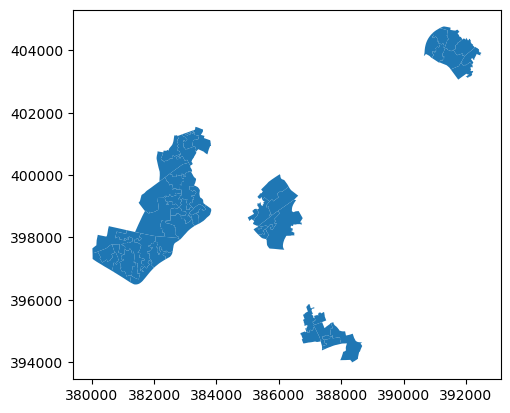

In [28]:
missing_lsoa.plot()

<Axes: >

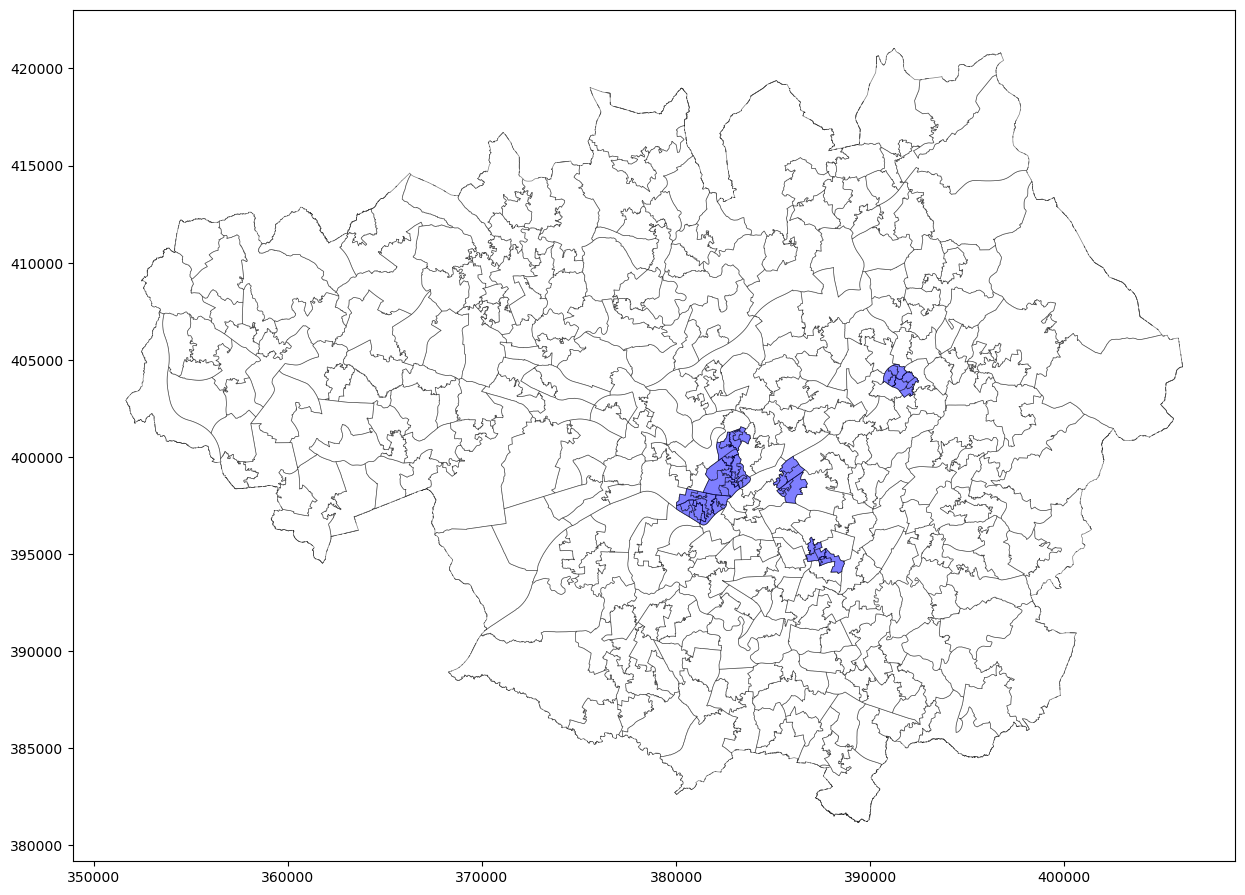

In [29]:
fig, ax = plt.subplots(figsize=(15, 15))

gdf_msoa.plot(ax=ax, facecolor="white", alpha=0.5, edgecolor="black", linewidth=0.5)
missing_lsoa.plot(ax=ax, color="blue", alpha=0.5, edgecolor="black", linewidth=0.5)

## Export to csv

In [30]:
merge_lsoa.to_csv("Data/lsoa_demand.csv")

In [31]:
merge_lsoa

,lsoa21cd,lsoa21nm,geometry,area_sqkm,Total,65+ Percentage,16- Percentage,pop_density,Lower layer Super Output Areas Code,Disabled-No Car Household
0,E01004901,Bolton 028E,"POLYGON ((366003.093 406666.688, 366004.412 40...",0.354363,1773,23.350254,15.172025,5003.350923,E01004901,39
1,E01005001,Bury 012B,"POLYGON ((375480.348 408593.123, 375481.063 40...",0.238302,1228,17.100977,19.218241,5153.129520,E01005001,14
2,E01004840,Bolton 012A,"POLYGON ((367374.781 411954.594, 367387.095 41...",4.181101,1769,25.438101,19.106840,423.094327,E01004840,56
3,E01005006,Bury 012D,"POLYGON ((377212.688 410849.500, 377231.906 41...",1.772635,2051,18.478791,20.234032,1157.034831,E01005006,60
4,E01004773,Bolton 003D,"POLYGON ((371776.559 412463.204, 371825.243 41...",0.266227,1985,17.934509,19.143577,7456.052936,E01004773,77
...,...,...,...,...,...,...,...,...,...,...
1763,E01006394,Wigan 021B,"POLYGON ((355212.000 403394.000, 355230.000 40...",0.592787,1535,29.185668,18.045603,2589.463159,E01006394,36
1764,E01006410,Wigan 020E,"POLYGON ((357596.954 403017.375, 357616.740 40...",0.628715,1261,28.152260,15.543220,2005.677534,E01006410,30
1765,E01006400,Wigan 021D,"POLYGON ((356213.760 403792.397, 356213.312 40...",0.569408,1982,12.108981,26.135217,3480.807917,E01006400,15
1766,E01006331,Wigan 031D,"POLYGON ((367336.970 401009.452, 367340.657 40...",0.596520,1501,24.250500,16.122585,2516.260480,E01006331,20


## Export to shp

In [32]:
merge_lsoa.to_file("Data/lsoa_demand.shp")

/tmp/ipykernel_920/491622495.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merge_lsoa.to_file("Data/lsoa_demand.shp")
